<a href="https://colab.research.google.com/github/Agil0509/NLP/blob/main/MakeMore2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
words = open('/content/names.txt','r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

In [ ]:
chars = sorted(set(''.join(words)))
stoi = {s: i+1 for i,s in enumerate(chars)}

stoi['.'] = 0
itos = {i: s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
block_size = 3
X, Y = [], []
for  w in words:
  context = [0] * block_size # 3 dene nokte
  for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      # print(''.join(itos[i]for i in context), '--->',itos[ix])
      context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.shape,X.dtype,Y.shape,Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [ ]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [ ]:
C = torch.randn((27,2))
C

tensor([[ 0.8156, -0.3125],
        [-0.3392, -1.2585],
        [-0.4468, -2.1162],
        [-0.8316, -0.1751],
        [-1.3988, -1.1398],
        [-0.9233,  0.2069],
        [-0.9461,  0.7062],
        [-2.2385,  0.2557],
        [-1.0958, -0.7015],
        [ 0.8405,  0.9274],
        [ 0.6346,  0.3562],
        [-0.5200,  0.4900],
        [ 1.4233,  2.0097],
        [ 0.4546, -1.0471],
        [-0.1529, -0.4047],
        [-0.1440,  0.1061],
        [-0.3562,  1.3040],
        [ 1.2523,  0.2915],
        [-1.1357,  0.9077],
        [ 1.0455,  1.7021],
        [ 0.5298,  0.2349],
        [ 1.3033, -0.7693],
        [ 0.6586,  0.4409],
        [-0.9945,  0.0522],
        [ 0.6030,  0.2486],
        [ 0.4582,  0.8364],
        [-1.4303, -0.6370]])

In [ ]:
C[[3,5,7,7]]

tensor([[-0.8316, -0.1751],
        [-0.9233,  0.2069],
        [-2.2385,  0.2557],
        [-2.2385,  0.2557]])

In [ ]:
F.one_hot(torch.tensor(5),num_classes = 27).float() @ C # 5 ci setri qaytarir

tensor([-0.9233,  0.2069])

In [ ]:
C[5]

tensor([-0.9233,  0.2069])

In [ ]:
X.shape

torch.Size([228146, 3])

In [ ]:
C[X].shape

torch.Size([228146, 3, 2])

In [ ]:
X[2]

tensor([ 0,  5, 13])

In [ ]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [ ]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [ ]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1).shape

torch.Size([228146, 6])

In [ ]:
emb[:,0,:].shape,emb[:,1,:].shape,emb[:,2,:].shape

(torch.Size([228146, 2]), torch.Size([228146, 2]), torch.Size([228146, 2]))

In [ ]:
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([228146, 6])

In [ ]:
a = torch.arange(18)

In [ ]:
a.shape

torch.Size([18])

In [ ]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [ ]:
a.storage()

<ipython-input-23-d39b3459ecdd>:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [ ]:
# emb.view(32,6)

In [ ]:
# emb.view(32,6) == torch.cat(torch.unbind(emb,1),1)

In [ ]:
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1)

In [ ]:
W2 = torch.randn((100,27)) # output ucun 27 neuron lazimdi ona gore (100,27)
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2

In [ ]:
logits.shape

torch.Size([228146, 27])

In [ ]:
counts = logits.exp()

In [ ]:
prob = counts / counts.sum(1,keepdim = True) # softmaxin formulasi

In [ ]:
prob.shape

torch.Size([228146, 27])

In [ ]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [ ]:
# prob[torch.arange(32),Y]

In [ ]:
g = torch.Generator().manual_seed(42)
C = torch.rand((27,2),generator= g)
W1 = torch.randn((6,100))
b1 = torch.randn(100)
W2 = torch.randn((100,27)) # output ucun 27 neuron lazimdi ona gore (100,27)
b2 = torch.randn(27)
parametrs = [C,W1,b1,W2,b2]

In [ ]:
sum(p.nelement() for p in parametrs)

3481

In [ ]:
emb = C[X]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
counts = logits.exp()
prob = counts / counts.sum(1,keepdims = True)
# loss = -prob[torch.arange(32),Y].log().mean()
# loss
loss = F.cross_entropy(logits,Y)
loss

tensor(18.6310)

In [ ]:
for p in parametrs:
  p.requires_grad = True

In [ ]:
for _ in range(10):
  emb = C[X]
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)
  logits = h@ W2 +b2
  loss = F.cross_entropy(logits,Y)
  print(loss.item())
  for p in parametrs:
    p.grad = None
  loss.backward()
  for p in parametrs:
    p.data += -0.1*p.grad

18.6309757232666
15.838497161865234
13.547964096069336
11.846064567565918
10.327568054199219
8.984156608581543
7.8077216148376465
6.849920272827148
6.121123790740967
5.5556721687316895


In [ ]:
torch.randint(0,X.shape[0],(32,))

tensor([179273,  55896,  35850,  36631,  66373,  66157, 118742,  62338, 160235,
           601,  83371, 118036,  59526, 162377, 185479,  77066, 109422,  94678,
        123336, 137425,   4270,  74565,  60004, 208721,   2423,  75112, 130596,
        203505,  93738, 121374, 180016,  66745])

In [ ]:
for i in range(10000):
  ix = torch.randint(0,X.shape[0],(32,))
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)
  logits = h@ W2 +b2
  loss = F.cross_entropy(logits,Y[ix])

  for p in parametrs:
    p.grad = None
  loss.backward()

  lr = 0.1
  for p in parametrs:
    p.data+= -lr * p.grad


print(loss.item())

2.522270917892456


In [ ]:
emb = C[X]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h@ W2 +b2
loss = F.cross_entropy(logits,Y)
loss

tensor(2.4763, grad_fn=<NllLossBackward0>)

In [ ]:
block_size = 3
def build_dataset(words):

  X, Y = [], []
  for  w in words:
    context = [0] * block_size # 3 dene nokte
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i]for i in context), '--->',itos[ix])
        context = context[1:] + [ix]
  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape,Y.shape)
  return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr,Ytr = build_dataset(words[:n1])
Xdev,Ydev = build_dataset(words[n1:n2])
Xte,Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
Xtr.shape,Xdev.shape,Xte.shape

(torch.Size([182625, 3]), torch.Size([22655, 3]), torch.Size([22866, 3]))

In [ ]:
g = torch.Generator().manual_seed(42)
C = torch.rand((27,10),generator= g)
W1 = torch.randn((30,300),generator= g)
b1 = torch.randn(300,generator= g)
W2 = torch.randn((300,27),generator= g) # output ucun 27 neuron lazimdi ona gore (100,27)
b2 = torch.randn(27)
parametrs = [C,W1,b1,W2,b2]

for p in parametrs:
  p.requires_grad = True

In [ ]:
for _ in range(10):
  emb = C[Xtr]
  h = torch.tanh(emb.view(-1,30) @ W1 + b1)
  logits = h@ W2 +b2
  loss = F.cross_entropy(logits,Ytr)
  print(loss.item())
  for p in parametrs:
    p.grad = None
  loss.backward()
  for p in parametrs:
    p.data += -0.1*p.grad

32.91849899291992
25.47926902770996
21.398887634277344
18.701942443847656
15.606327056884766
13.860812187194824
13.208959579467773
12.607254028320312
12.033086776733398
10.429430961608887


In [ ]:
for i in range(10000):
  ix = torch.randint(0,X.shape[0],(32,))
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1,30) @ W1 + b1)
  logits = h@ W2 +b2
  loss = F.cross_entropy(logits,Y[ix])

  for p in parametrs:
    p.grad = None
  loss.backward()

  lr = 0.1
  for p in parametrs:
    p.data+= -lr * p.grad


print(loss.item())

2.9470202922821045


In [ ]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h@ W2 +b2
loss = F.cross_entropy(logits,Ydev)
loss

tensor(3.1491, grad_fn=<NllLossBackward0>)

In [ ]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [ ]:
lri = []
lossi = []
stepi = []

In [ ]:
for i in range(30000):
  ix = torch.randint(0,Xtr.shape[0],(32,))
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1,30) @ W1 + b1)
  logits = h@ W2 +b2
  loss = F.cross_entropy(logits,Ytr[ix])

  for p in parametrs:
    p.grad = None
  loss.backward()

  lr = 0.01
  for p in parametrs:
    p.data+= -lr * p.grad

  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

1.9904619455337524


In [ ]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h@ W2 +b2
loss = F.cross_entropy(logits,Ydev)
loss

tensor(2.3104, grad_fn=<NllLossBackward0>)

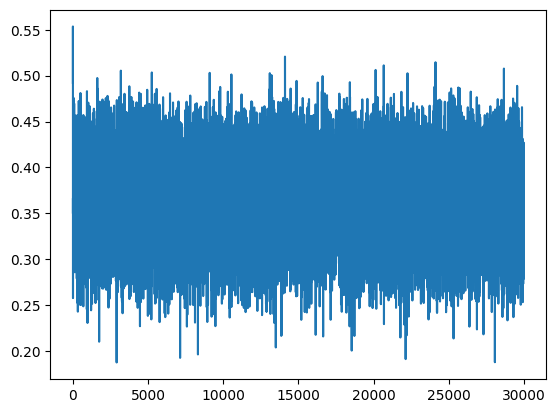

In [ ]:
plt.plot(stepi,lossi)

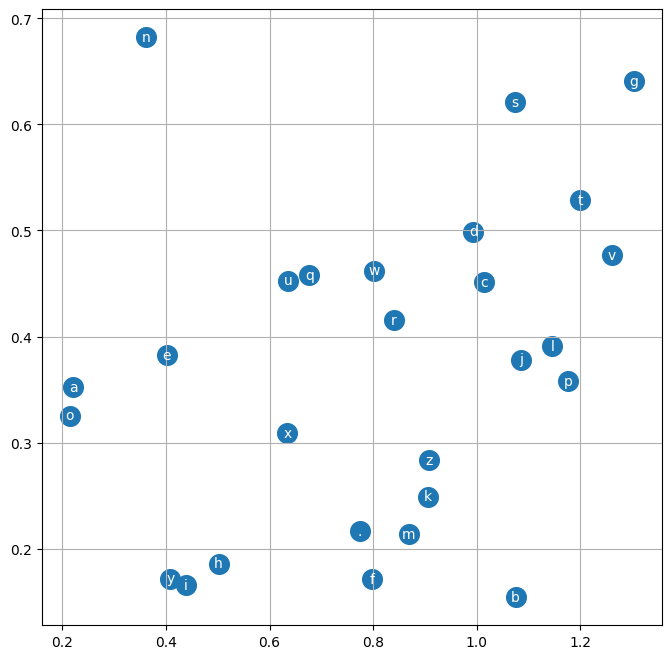

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(C[:,0].data,C[:,1].data,s = 200)
for i in range(C.shape[0]):
  plt.text(C[i,0],C[i,1],itos[i],ha = 'center',va = 'center',color = 'white')

plt.grid('minor')

In [ ]:
for _ in range(20):
  out = []
  context = [0] * block_size

  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1,-1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits,dim = 1)
    ix = torch.multinomial(probs,num_samples = 1).item()
    context = context[1:]+[ix]
    out.append(ix)
    if ix == 0:
      break

  print(''.join(itos[i] for i in out))

kyn.
macahkhal.
teina.
jlima.
weedekriliah.
arvikmarlelan.
meremwechyer.
zan.
jolashel.
arah.
lane.
qun.
ari.
cencann.
kec.
grayah.
zis.
ola.
aosh.
elle.
